## FBA simulation iAB_RBC_283.xml
Simulating the FBA part submodel with `cobrapy`. Implements checks that
* model is simulating
* gene deletions
* uniqueness of solutions
* drive the model via exchange reactions

This requires
* `cobrapy >= 0.6.0a4`

In [3]:
from __future__ import print_function, absolute_import

import pandas as pd
import cobra
from matplotlib import pyplot as plt

from sbmlutils import fbc
from sbmlutils.dfba.analysis import set_matplotlib_parameters
from sbmlutils.dfba.rbc import model_factory

set_matplotlib_parameters()

In [4]:
# load model
sbml_path = './results/v{}/rbc_fba.xml'.format(model_factory.version)
print(sbml_path)
model = cobra.io.read_sbml_model(sbml_path)
cobra.io.sbml3.validate_sbml_model(sbml_path)

./results/v1/rbc_fba.xml


(<Model rbc_fba at 0x7f19cebe3d90>,
 {'SBML errors': [], 'other': [], 'validator': [], 'warnings': []})

In [5]:
# objective function & boundaries
# pprint(mfba.objective)
df = fbc.cobra_reaction_info(model)
print(df.head())
print("reactions:", len(model.reactions))
print("metabolites:", len(model.metabolites))
print("genes:", len(model.genes))


                lb        ub reversibility boundary objective_coefficient  \
EX_35cgmp_e      0     0.024         False     True                     0   
EX_3moxtyr_e     0    0.0324         False     True                     0   
EX_4pyrdx_e      0  0.000383         False     True                     0   
EX_5aop_e    -0.02         0         False     True                     0   
EX_ac_e          0  3.74e-05         False     True                     0   

                            forward_variable  \
EX_35cgmp_e      0.0 <= EX_35cgmp_e <= 0.024   
EX_3moxtyr_e   0.0 <= EX_3moxtyr_e <= 0.0324   
EX_4pyrdx_e   0.0 <= EX_4pyrdx_e <= 0.000383   
EX_5aop_e              0 <= EX_5aop_e <= 0.0   
EX_ac_e           0.0 <= EX_ac_e <= 3.74e-05   

                                  reverse_variable  
EX_35cgmp_e    0 <= EX_35cgmp_e_reverse_bc0e4 <= 0  
EX_3moxtyr_e  0 <= EX_3moxtyr_e_reverse_a6f79 <= 0  
EX_4pyrdx_e    0 <= EX_4pyrdx_e_reverse_25401 <= 0  
EX_5aop_e     0 <= EX_5aop_e_reverse

In [7]:
# Exchange reactions
ex_idx = df.index.str.contains('^EX_')
df[ex_idx]

,lb,ub,reversibility,boundary,objective_coefficient,forward_variable,reverse_variable
EX_35cgmp_e,0,0.024,False,True,0,0.0 <= EX_35cgmp_e <= 0.024,0 <= EX_35cgmp_e_reverse_bc0e4 <= 0
EX_3moxtyr_e,0,0.0324,False,True,0,0.0 <= EX_3moxtyr_e <= 0.0324,0 <= EX_3moxtyr_e_reverse_a6f79 <= 0
EX_4pyrdx_e,0,0.000383,False,True,0,0.0 <= EX_4pyrdx_e <= 0.000383,0 <= EX_4pyrdx_e_reverse_25401 <= 0
EX_5aop_e,-0.02,0,False,True,0,0 <= EX_5aop_e <= 0.0,0 <= EX_5aop_e_reverse_6a527 <= 0.02
EX_ac_e,0,3.74e-05,False,True,0,0.0 <= EX_ac_e <= 3.74e-05,0 <= EX_ac_e_reverse_0be96 <= 0
EX_acald_e,-10,10,True,True,0,0 <= EX_acald_e <= 10.0,0 <= EX_acald_e_reverse_c096e <= 10.0
EX_acnam_e,-3.74e-05,0,False,True,0,0 <= EX_acnam_e <= 0.0,0 <= EX_acnam_e_reverse_7701a <= 3.74e-05
EX_ade_e,-0.014,0.01,True,True,0,0 <= EX_ade_e <= 0.01,0 <= EX_ade_e_reverse_ea308 <= 0.014
EX_adn_e,-0.01,0.014,True,True,0,0 <= EX_adn_e <= 0.014,0 <= EX_adn_e_reverse_dffe8 <= 0.01
EX_adrnl_e,-0.0378,0,False,True,0,0 <= EX_adrnl_e <= 0.0,0 <= EX_adrnl_e_reverse_b66c5 <= 0.0378


In [10]:
# optimize and Flux Variability Analysis (FVA)
s = model.optimize(objective_sense="maximize")
model.summary(fva=True)

IN FLUXES                                OUT FLUXES                               OBJECTIVES
---------------------------------------  ---------------------------------------  ------------
id             Flux  Range               id             Flux  Range               NaKt  2.94
----------  -------  ------------------  ----------  -------  ------------------
co2_e       5.12     [5.01, 5.87]        h_e         8.05     [7.91, 10]
h2o_e       4.63     [-4.62, 6.27]       hco3_e      5.87     [5.87, 5.87]
glc__D_e    1.12     [1.12, 1.12]        lac__L_e    2.93     [1.88, 3.68]
h2o2_e      0.75     [0, 10]             pyr_e       0.75     [3.7e-05, 1.8]
mal__L_e    0.5      [-0.25, 0.5]        ade_e       0.01     [0.01, -0.014]
gal_e       0.317    [0.317, 0.317]      nh4_e       4.7e-05  [4.7e-05, 0.024]
fum_e       0.25     [0.25, -0.5]        ac_e        3.7e-05  [3.7e-05, 3.7e-05]
adn_e       0.01     [0.01, 0.01]        o2_e        0        [0, 5]
man_e       0.01     [0.01, 0.01

In [12]:
# pfba (minimal flux)
# still no unique solution for the problem
s = model.optimize(objective_sense="maximize")
cobra.flux_analysis.pfba(model)
model.summary(fva=True)

IN FLUXES                                OUT FLUXES                               OBJECTIVES
---------------------------------------  ---------------------------------------  ------------
id             Flux  Range               id             Flux  Range               NaKt  2.94
----------  -------  ------------------  ----------  -------  ------------------
co2_e       5.37     [5.01, 5.87]        h_e         8.3      [7.91, 10]
h2o_e       4.88     [-4.62, 6.27]       hco3_e      5.87     [5.87, 5.87]
glc__D_e    1.12     [1.12, 1.12]        lac__L_e    2.93     [1.88, 3.68]
h2o2_e      0.5      [0, 10]             pyr_e       0.5      [3.7e-05, 1.8]
mal__L_e    0.5      [-0.25, 0.5]        ade_e       0.01     [0.01, -0.014]
gal_e       0.317    [0.317, 0.317]      nh4_e       4.7e-05  [4.7e-05, 0.024]
adn_e       0.01     [0.01, 0.01]        ac_e        3.7e-05  [3.7e-05, 3.7e-05]
man_e       0.01     [0.01, 0.01]        o2_e        0        [0, 5]
fru_e       0.0075   [0.0075, 0.

In [19]:
# What is the optimization function? 
# Here the maximization of ATP (which does not make much sense)
model.reactions.NaKt.reaction

'atp_c + h2o_c + 2.0 k_e + 3.0 na1_c --> adp_c + h_c + 2.0 k_c + 3.0 na1_e + pi_c'

## Change the bounds
Driving the model via changing the bounds of the exchange reactions
* in coupling based on maximal uptake rates and availability of substrate

In [24]:
import numpy as np
import pandas as pd

# set of bounds (we can't go to zero, a minimal amount of glc is needed for biomass generation)
# More complete models could switch to alternative carbon sources
glc_bounds = np.linspace(-3, 0, 10)

results = []
for lb_glc in glc_bounds:
    # set the lower bound (uptake direction) of the exchange reaction
    print(lb_glc)
    model.reactions.get_by_id("EX_glc__D_e").lower_bound = lb_glc
    # pFBA
    s = model.optimize(objective_sense="maximize")
    s = cobra.flux_analysis.pfba(model)
    model.summary(fva=True)
    
    fluxes = s.fluxes
    results.append(fluxes)
df = pd.DataFrame(results)

-3.0
IN FLUXES                                   OUT FLUXES                                      OBJECTIVES
------------------------------------------  ----------------------------------------------  ------------
id                 Flux  Range              id                 Flux  Range                  NaKt  2.98
---------------  ------  -----------------  ---------------  ------  ---------------------
co2_e            5.36    [-0.328, 5.85]     h_e              8.61    [8.22, 10]
h2o_e            4.67    [6.46, -10]        hco3_e           5.87    [5.87, 5.87]
glc__D_e         1.6     [1.29, 3]          lac__L_e         3.26    [2.37, 3.68]
h2o2_e           0.557   [-0.000611, 10]    pyr_e            0.495   [0, 1.63]
mal__L_e         0.5     [-0.25, 0.5]       ala__L_e         0.08    [0.0549, 0.08]
cys__L_e         0.08    [0.08, 0.08]       gthox_e          0.04    [0.04, 0.04]
gly_e            0.08    [0.08, 0.08]       nh4_e            0.01    [0.009, 0.0341]
gluala_e         0.

In [25]:
# Find Exchange reactions & Internal Reactions
ex_rids = []
in_rids = []
for r in model.reactions:
    rid = r.id
    if (rid.startswith('EX_')):
        ex_rids.append(rid)
    else:
        in_rids.append(rid)
        
print(len(ex_rids), 'exchange fluxes')
# print()
# print(in_rids)

76 exchange fluxes


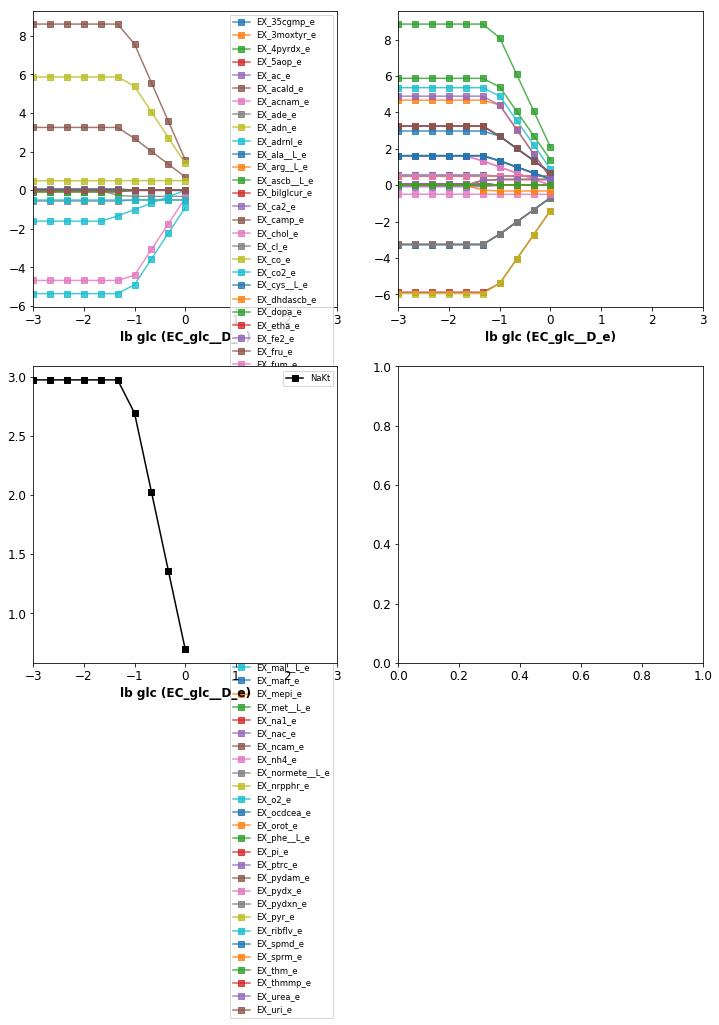

In [28]:
# Plot internal, external, and biomass reactions
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for rid in ex_rids:
    ax1.plot(glc_bounds, df[rid], marker='s', alpha=0.8, label=rid)

for rid in in_rids:
    ax2.plot(glc_bounds, df[rid], marker='s', alpha=0.8, label=rid)

ax3.plot(glc_bounds, df["NaKt"], color="black", label="NaKt",
        marker="s")
    
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('lb glc (EC_glc__D_e)')
    ax.set_xlim(-3,3)

ax1.legend()
ax3.legend()

plt.show()
fig.savefig("rbc_glc_dependency.png", bbox="tight")